In [9]:
library(dplyr)
library(ggplot2)
library(RColorBrewer)

In [1]:
df_beta = read.csv("/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_endodiff/debug_May2021/genetic_effect/MOFA10/eqtl_tot_genetic_effect_all.txt", sep="\t",row.names = 1)
head(df_beta)

,ENSG00000005059_CCDC109B_.4_110648632_T_A,ENSG00000006016_CRLF1_.19_18735221_G_T,ENSG00000006459_KDM7A_.7_139913409_G_A,ENSG00000013297_CLDN11_.3_170402765_T_C,ENSG00000021300_PLEKHB1_.11_73339784_G_A,ENSG00000029639_TFB1M_.6_155635808_C_G,ENSG00000033178_UBA6_.4_68480525_C_T,ENSG00000035115_SH3YL1_.2_256116_G_T,ENSG00000059377_TBXAS1_.7_139547370_G_A,ENSG00000063761_ADCK1_.14_78311319_G_A,...,ENSG00000248098_BCKDHA_.19_41937095_G_A,ENSG00000248124_RRN3P1_.16_21818292_A_C,ENSG00000250317_SMIM20_.4_25918516_A_G,ENSG00000253203_GUSBP3_.5_68922087_T_G,ENSG00000254184_TYW1B_.7_72200923_G_A,ENSG00000256018_HIST1H3G_.6_26198845_G_C,ENSG00000256073_C21orf119_.21_33728588_C_A,ENSG00000259024_TVP23C.CDRT4_.17_15434991_C_T,ENSG00000259803_SLC22A31_.16_89234110_G_C,ENSG00000267323_SLC25A1P5_.19_28298186_T_C
21843_1#10,-0.02336156,0.037167263,-0.029627685,0.18296979,-0.03793941,-0.029324411,0.031398501,-0.03962300,0.08013833,0.027498382,...,-0.08185803,-0.10862369,-0.10317566,-0.048543205,0.095111678,-0.002571070,-0.055608331,0.1931245,-0.06168149,0.054686251
21843_1#100,-0.04797379,-0.002567715,-0.050303678,0.14204539,-0.06425603,-0.017894114,-0.064683766,-0.08820444,0.23273882,0.040375905,...,-0.16133495,-0.45571807,-0.09858982,-0.095641305,0.007662211,-0.001386594,-0.094118770,0.2614240,-0.16271379,-0.037051849
21843_1#101,-0.01707154,-0.038323702,0.001072175,0.05068042,-0.04211749,-0.028163711,-0.079442257,-0.05854781,0.14245545,0.019225081,...,-0.08464140,-0.22917228,-0.08647358,-0.027566411,0.030433187,-0.038522875,-0.007152012,0.1489600,-0.08467373,-0.001068028
21843_1#102,-0.06849843,0.029141143,0.006591071,0.27772236,0.05210891,-0.039448204,0.002744249,-0.08783030,0.06083871,0.034590880,...,-0.05465162,-0.09382258,-0.12475134,-0.009728905,0.052761776,-0.008942713,-0.024298554,0.2108875,-0.06577307,0.020432219
21843_1#103,-0.02065975,0.017882432,-0.019780588,0.12713250,-0.04432031,-0.010911430,-0.024407791,-0.03931027,0.06883815,0.009218694,...,-0.04543236,-0.13128624,-0.06491895,-0.033262391,0.063575007,0.044047100,-0.037472203,0.1392061,-0.06160699,0.047756355
21843_1#105,0.03203034,0.029327187,-0.015424171,0.13315777,-0.03401761,-0.004702419,-0.075634975,-0.02003224,0.09548422,0.003292832,...,-0.08535482,-0.14593277,-0.07771164,-0.053617513,0.141638220,0.019637691,0.041395040,0.1576655,-0.03509197,0.113248113


In [4]:
nrow(df_beta)

[1] 33964

In [2]:
colnames(df_beta)[grep("CPZ",colnames(df_beta))]

[1] "ENSG00000109625_CPZ_.4_8567600_T_A"

In [3]:
### MOFA factors across cells
df_mofas = read.csv("/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_endodiff/debug_May2021/mofa_logcounts_model_factors.csv", row.names = 1)
nrow(df_mofas)
head(df_mofas,2)

[1] 34256

,MOFA1,MOFA2,MOFA3,MOFA4,MOFA5,MOFA6,MOFA7,MOFA8,MOFA9,MOFA10,MOFA11,MOFA12,MOFA13,MOFA14,MOFA15,MOFA16,MOFA17,MOFA18,MOFA19,MOFA20
21843_1#10,-0.5977040,1.067436,0.0564961,1.347661,0.6407429,0.3378262,-0.4664193,0.01520844,0.2922428,-0.6327374,-0.5833180,0.4731209,0.4548455,-0.9910469,0.9065298,-0.7866174,0.4459964,-1.810175,-1.0397955,0.26804527
21843_1#100,0.2332847,2.137884,0.6468115,1.129460,-0.3527733,-0.0918056,0.9241371,-0.37349156,1.7895933,-0.6592327,0.4622862,-0.1388127,-2.2209369,1.5540730,-1.5173632,-0.3502506,-0.1655910,1.199816,0.7298591,0.04844414


In [7]:
df_gene = data.frame(cells = rownames(df_beta), gene = df_beta[,grep("CPZ",colnames(df_beta))])
df_mofa = cbind(df_mofas,c("MOFA1","MOFA2"), data.frame(cells = rownames(df_mofas)))
df_plot = inner_join(df_gene, df_mofa)

Joining, by = "cells"


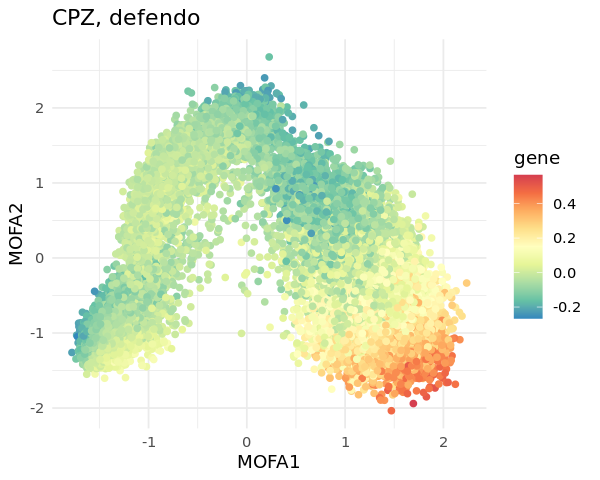

In [12]:
options(repr.plot.width=5, repr.plot.height=4)
p = ggplot(df_plot, aes(x = MOFA1, y = MOFA2, colour = gene)) + geom_point()
p = p + scale_colour_gradientn(colors = rev(brewer.pal(9,"Spectral")))
p + theme_minimal() + ggtitle("CPZ, defendo")